In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Usaremos pandas para manejar los datos generados
from matplotlib.path import Path # Para la función punto-en-polígono

# --- Vértices del Pentágono Exterior (Escala 40%) ---
P_H2 = (0, 40)
P_C2H6 = (-38, 12.4)
P_CH4 = (-23.5, -32.4)
P_C2H4 = (23.5, -32.4)
P_C2H2 = (38, 12.4)

pentagon_outer_vertices = [P_H2, P_C2H6, P_CH4, P_C2H4, P_C2H2, P_H2]
x_outer, y_outer = zip(*pentagon_outer_vertices)

# --- Definiciones de Zonas (Vértices Corregidos por el Usuario) ---
# El usuario ha proporcionado estas listas de vértices.
# Cada polígono ya está cerrado (el primer vértice se repite al final).

zone_PD_vertices = [
    (-1, 33), (0, 33), (0, 24.5), (-1, 24.5),
    (-1, 33) # Cerrar polígono
]
zone_S_vertices = [
    (-38, 12.4),  # P_C2H6
    (-35, 3.1),   # K5
    (0, 1.5),     # K6
    (0, 24.5),    # K3 (frontera con PD)
    (-1, 24.5),
    (-1, 33),
    (0, 33),
    (0, 40),      # K4 (frontera con PD) # Corrección: Este punto es P_H2, el vértice superior de PD está en (0,33)
    (-38, 12.4) # Cerrar polígono
]
zone_T1_O_vertices = [
    (-35, 3.1),
    (-23.5, -32.4),
    (-22.5, -32.4),
    (-18.64, -25.76), # Punto intermedio, verificar si es necesario o si define una nueva sub-zona
    (-11, -8),
    (-6, -4),
    (0, -3), # Este punto parece más de T3_C o T2_C
    (0, 1.5), # Conexión con S y D2
    (-35, 3.1) # Cerrar polígono
]
zone_T2_O_vertices = [ # Esta zona es típicamente un triángulo pequeño
    (-22.5, -32.4),
    (-21.5, -32.4),  # Vértice P_CH4
    (-18.64, -25.76), # Este punto si se incluye haría un cuadrilátero, verificar con la figura original
    (-22.5, -32.4) # Cerrar polígono
]
zone_T2_C_vertices = [
    (-21.5, -32.4),
    (-18.64, -25.76), # Este punto podría ser de T1_O o T1_C
    (-6, -4),   # Vértice superior compartido con T1-O, T1-C
    (1, -32.4), # Este punto parece más de T3_C
    (-21.5, -32.4) # Cerrar polígono
]
zone_T3_C_vertices = [
    (-6,-4), 
    (-3.5, -3.5),  # P_C2H6
    (2.5, -32.4), 
    (1, -32.4),
    (-6,-4) # Cerrar polígono
]
zone_T1_C_vertices = [ # Triángulo
    # (-18.64, -25.76), # Verificar si este punto es parte o si es solo (-11,-8),(-6,-4),(-3.5,-3.5)
   (-18.64, -25.76),
    (-11, -8),  # P_C2H6
    (-6, -4), 
    (-18.64, -25.76) # Cerrar polígono
]
zone_T3_H_vertices = [
     (-3.5, -3.5),
    (0, -3),  # P_C2H6
    (24.3, -30), 
    (23.5, -32.4),
    (2.3, -32.4),
    (-3.5, -3.5) # Cerrar polígono
]
zone_D2_vertices = [
   (0, -3),  # P_C2H6
    (0, 1.5),  # P_C2H6
    (4, 16), 
    (32, -6.1),
    (24.3, -30),
    (0, -3) # Cerrar polígono
]
zone_D1_vertices = [
   (0, 40),
    (38, 12.4),  # P_C2H6
    (32, -6.1), 
    (4, 16),
    (0, 1.5),
    (0, 40) # Cerrar polígono
]

# Diccionario 'all_zones' actualizado con tus definiciones
all_zones = {
    "PD": zone_PD_vertices[:-1], # Quitamos el último punto repetido para Path, ya que Path lo cierra
    "S": zone_S_vertices[:-1],
    "T1-O": zone_T1_O_vertices[:-1],
    "T2-O": zone_T2_O_vertices[:-1],
    "T2-C": zone_T2_C_vertices[:-1],
    "T3-C": zone_T3_C_vertices[:-1],
    "T1-C": zone_T1_C_vertices[:-1],
    "T3-H": zone_T3_H_vertices[:-1],
    "D2": zone_D2_vertices[:-1],
    "D1": zone_D1_vertices[:-1]
}

# Para el rellenado visual, usamos los polígonos cerrados
closed_zones_vertices = {
    "PD": zone_PD_vertices, "S": zone_S_vertices, "T1-O": zone_T1_O_vertices,
    "T2-O": zone_T2_O_vertices, "T2-C": zone_T2_C_vertices, "T3-C": zone_T3_C_vertices,
    "T1-C": zone_T1_C_vertices, "T3-H": zone_T3_H_vertices, "D2": zone_D2_vertices,
    "D1": zone_D1_vertices
}


# --- Función para generar puntos dentro de un polígono ---
def generate_points_in_polygon(polygon_vertices, num_points):
    """
    Genera un número específico de puntos aleatorios dentro de un polígono dado.
    """
    if len(polygon_vertices) < 3: # Un polígono necesita al menos 3 vértices
        return []
    polygon_path = Path(polygon_vertices)
    points = []
    
    min_x = np.min([v[0] for v in polygon_vertices])
    max_x = np.max([v[0] for v in polygon_vertices])
    min_y = np.min([v[1] for v in polygon_vertices])
    max_y = np.max([v[1] for v in polygon_vertices])
    
    generated_count = 0
    # Añadir un límite de intentos para evitar bucles infinitos si el polígono es muy pequeño o complejo
    max_attempts = num_points * 100 
    attempts = 0

    while generated_count < num_points and attempts < max_attempts :
        random_x = np.random.uniform(min_x, max_x)
        random_y = np.random.uniform(min_y, max_y)
        point = (random_x, random_y)
        
        if polygon_path.contains_point(point):
            points.append(point)
            generated_count += 1
        attempts +=1
            
    if attempts >= max_attempts and generated_count < num_points:
        print(f"    Advertencia: Se alcanzó el máximo de intentos ({max_attempts}) para generar {num_points} puntos. Solo se generaron {generated_count}.")
    return points

# --- Generar los datos de entrenamiento ---
num_points_per_zone = 5000 
all_generated_points = []
all_labels = []

print(f"Generando {num_points_per_zone} puntos por zona...")

for zone_name, vertices in all_zones.items(): # Usamos all_zones que no tiene el punto repetido para Path
    print(f"  Generando puntos para la zona: {zone_name}")
    if not vertices: # Comprobar si la lista de vértices está vacía
        print(f"    Advertencia: La zona {zone_name} no tiene vértices definidos. Saltando.")
        continue
    generated_points = generate_points_in_polygon(vertices, num_points_per_zone)
    all_generated_points.extend(generated_points)
    all_labels.extend([zone_name] * len(generated_points)) # Usar len(generated_points)
    print(f"    Puntos generados para {zone_name}: {len(generated_points)}")

# Crear un DataFrame de Pandas con los datos generados
df_generated_data = pd.DataFrame(all_generated_points, columns=['x_centroid', 'y_centroid'])
df_generated_data['fault_zone'] = all_labels

print(f"\nTotal de puntos generados: {len(df_generated_data)}")
if not df_generated_data.empty:
    print("Primeras filas del DataFrame generado:")
    print(df_generated_data.head())
else:
    print("No se generaron datos.")

# --- Crear la Figura y los Ejes para Visualización ---
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(x_outer, y_outer, 'k-', label='Pentágono Exterior', linewidth=2)

zone_colors = {
    "PD": "cyan", "S": "lightgreen", "T1-O": "red", "T2-O": "blue",
    "T2-C": "orange", "T1-C": "purple", "T3-C": "pink", "T3-H": "brown",
    "D2": "grey", "D1": "darkkhaki"
}

legend_handles = {} # Para controlar las etiquetas de la leyenda

for zone_name, vertices_for_plot in closed_zones_vertices.items(): # Usamos closed_zones_vertices para el ploteo
    if not vertices_for_plot or len(vertices_for_plot) < 3:
        print(f"Saltando el ploteo de la zona {zone_name} por tener pocos vértices para el relleno.")
        continue

    vx, vy = zip(*vertices_for_plot)
    color = zone_colors.get(zone_name, 'black')
    
    # Graficar el contorno de la zona
    line, = ax.plot(vx, vy, color=color, linestyle='-', marker='o', markersize=3)
    ax.fill(vx, vy, color=color, alpha=0.3)
    if zone_name not in legend_handles:
        legend_handles[zone_name] = line


    # Graficar una muestra de los puntos generados para esta zona
    zone_data = df_generated_data[df_generated_data['fault_zone'] == zone_name]
    sample_size = min(len(zone_data), 100)
    
    if not zone_data.empty and sample_size > 0:
        sample_points = zone_data.sample(n=sample_size, random_state=42)
        scatter = ax.scatter(sample_points['x_centroid'], sample_points['y_centroid'], 
                           color=color, 
                           s=8, alpha=0.7, edgecolors='w', linewidths=0.5) # Puntos más visibles
        # No añadir scatter a la leyenda principal para no duplicar
    elif not zone_data.empty and sample_size == 0 and len(zone_data) > 0 : # si hay datos pero sample_size es 0 por alguna razón
         scatter = ax.scatter(zone_data['x_centroid'], zone_data['y_centroid'],
                           color=color,
                           s=8, alpha=0.7, edgecolors='w', linewidths=0.5)


key_points_coords = {
    "P_H2": P_H2, "P_C2H6": P_C2H6, "P_CH4": P_CH4, "P_C2H4": P_C2H4, "P_C2H2": P_C2H2,
}
for name, (px, py) in key_points_coords.items():
    ax.text(px + 0.5, py + 0.5, name, fontsize=8)
    ax.plot(px, py, 'ko', markersize=3)

ax.set_xlabel("Coordenada X")
ax.set_ylabel("Coordenada Y")
ax.set_title("Pentágono de Duval: Zonas de Falla y Centroides Artificiales Generados")
ax.axhline(0, color='grey', lw=0.5, linestyle='--')
ax.axvline(0, color='grey', lw=0.5, linestyle='--')
ax.grid(True, linestyle=':', alpha=0.6)

# Crear leyenda con los contornos de las zonas
legend_items = [plt.Rectangle((0, 0), 1, 1, color=zone_colors[name], alpha=0.5) for name in all_zones.keys()]
legend_labels = list(all_zones.keys())
ax.legend(legend_items, legend_labels, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='small', title="Zonas de Falla")

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
ax.set_aspect('equal', adjustable='box')
plt.xlim(-45, 45)
plt.ylim(-40, 45)

plt.show()

# Guardar el DataFrame en un archivo CSV (opcional)
if not df_generated_data.empty:
    df_generated_data.to_csv("pentagon_training_data_corregido.csv", index=False)
    print("\nDatos de entrenamiento guardados en pentagon_training_data_corregido.csv")



Áreas calculadas por zona:
  PD: 8.50
  S: 883.35
  T1-O: 573.59
  T2-O: 3.32
  T2-C: 330.35
  T3-C: 58.92
  T1-C: 29.12
  T3-H: 403.62
  D2: 713.54
  D1: 803.10
Área total calculada de todas las zonas: 3807.41

Ajustando número de puntos. Suma asignada: 199999, Objetivo: 200000
Número de puntos a generar por zona (proporcional al área):
  PD: 446
  S: 46403
  T1-O: 30130
  T2-O: 174
  T2-C: 17353
  T3-C: 3095
  T1-C: 1530
  T3-H: 21202
  D2: 37481
  D1: 42186
  Generando 446 puntos para la zona: PD
    Puntos realmente generados para PD: 446
  Generando 46403 puntos para la zona: S
    Puntos realmente generados para S: 46403
  Generando 30130 puntos para la zona: T1-O
    Puntos realmente generados para T1-O: 30130
  Generando 174 puntos para la zona: T2-O
    Puntos realmente generados para T2-O: 174
  Generando 17353 puntos para la zona: T2-C
    Puntos realmente generados para T2-C: 17353
  Generando 3095 puntos para la zona: T3-C
    Puntos realmente generados para T3-C: 3095
  G

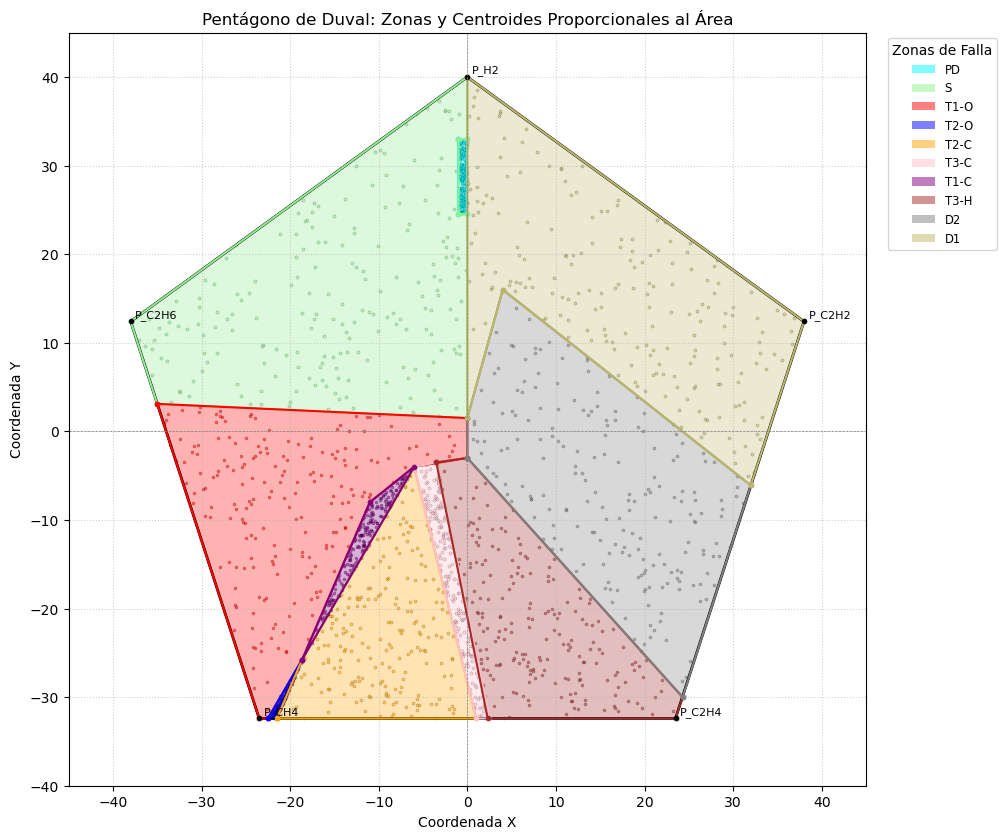


Datos de entrenamiento guardados en pentagon_training_data_proporcional.csv


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.path import Path

# --- Vértices del Pentágono Exterior (Escala 40%) ---
P_H2 = (0, 40)
P_C2H6 = (-38, 12.4)
P_CH4 = (-23.5, -32.4)
P_C2H4 = (23.5, -32.4)
P_C2H2 = (38, 12.4)

pentagon_outer_vertices = [P_H2, P_C2H6, P_CH4, P_C2H4, P_C2H2, P_H2]
x_outer, y_outer = zip(*pentagon_outer_vertices)

# --- Definiciones de Zonas (Vértices Corregidos por el Usuario) ---
# Estas son las definiciones que proporcionaste en el último mensaje.
# Es CRUCIAL que estas definiciones sean correctas y formen polígonos válidos.
zone_PD_vertices_user = [
    (-1, 33), (0, 33), (0, 24.5), (-1, 24.5),
    (-1, 33) # Cerrar polígono
]
zone_S_vertices_user = [
    (-38, 12.4),  # P_C2H6
    (-35, 3.1),   # K5
    (0, 1.5),     # K6
    (0, 24.5),    # K3 (frontera con PD)
    (-1, 24.5),
    (-1, 33),
    (0, 33),
    (0, 40),      # K4 (frontera con PD) # Corrección: Este punto es P_H2, el vértice superior de PD está en (0,33)
    (-38, 12.4) # Cerrar polígono
]
zone_T1_O_vertices_user = [
    (-35, 3.1),
    (-23.5, -32.4),
    (-22.5, -32.4),
    (-18.64, -25.76), # Punto intermedio, verificar si es necesario o si define una nueva sub-zona
    (-11, -8),
    (-6, -4),
    (0, -3), # Este punto parece más de T3_C o T2_C
    (0, 1.5), # Conexión con S y D2
    (-35, 3.1) # Cerrar polígono
]
zone_T2_O_vertices_user = [ # Esta zona es típicamente un triángulo pequeño
    (-22.5, -32.4),
    (-21.5, -32.4),  # Vértice P_CH4
    (-18.64, -25.76), # Este punto si se incluye haría un cuadrilátero, verificar con la figura original
    (-22.5, -32.4) # Cerrar polígono
]
zone_T2_C_vertices_user = [
    (-21.5, -32.4),
    (-18.64, -25.76), # Este punto podría ser de T1_O o T1_C
    (-6, -4),   # Vértice superior compartido con T1-O, T1-C
    (1, -32.4), # Este punto parece más de T3_C
    (-21.5, -32.4) # Cerrar polígono
]
zone_T3_C_vertices_user = [
    (-6,-4), 
    (-3.5, -3.5),  # P_C2H6
    (2.5, -32.4), 
    (1, -32.4),
    (-6,-4) # Cerrar polígono
]
zone_T1_C_vertices_user = [ # Triángulo
    # (-18.64, -25.76), # Verificar si este punto es parte o si es solo (-11,-8),(-6,-4),(-3.5,-3.5)
   (-18.64, -25.76),
    (-11, -8),  # P_C2H6
    (-6, -4), 
    (-18.64, -25.76) # Cerrar polígono
]
zone_T3_H_vertices_user = [
     (-3.5, -3.5),
    (0, -3),  # P_C2H6
    (24.3, -30), 
    (23.5, -32.4),
    (2.3, -32.4),
    (-3.5, -3.5) # Cerrar polígono
]
zone_D2_vertices_user = [
   (0, -3),  # P_C2H6
    (0, 1.5),  # P_C2H6
    (4, 16), 
    (32, -6.1),
    (24.3, -30),
    (0, -3) # Cerrar polígono
]
zone_D1_vertices_user = [
   (0, 40),
    (38, 12.4),  # P_C2H6
    (32, -6.1), 
    (4, 16),
    (0, 1.5),
    (0, 40) # Cerrar polígono
]


# Diccionario 'all_zones_definitions' con tus definiciones (sin el último punto repetido para Path)
all_zones_definitions = {
    "PD": zone_PD_vertices_user[:-1],
    "S": zone_S_vertices_user[:-1],
    "T1-O": zone_T1_O_vertices_user[:-1],
    "T2-O": zone_T2_O_vertices_user[:-1],
    "T2-C": zone_T2_C_vertices_user[:-1],
    "T3-C": zone_T3_C_vertices_user[:-1],
    "T1-C": zone_T1_C_vertices_user[:-1],
    "T3-H": zone_T3_H_vertices_user[:-1],
    "D2": zone_D2_vertices_user[:-1],
    "D1": zone_D1_vertices_user[:-1]
}

# Para el rellenado visual, usamos los polígonos cerrados
closed_zones_for_plot = {
    "PD": zone_PD_vertices_user, "S": zone_S_vertices_user, "T1-O": zone_T1_O_vertices_user,
    "T2-O": zone_T2_O_vertices_user, "T2-C": zone_T2_C_vertices_user, "T3-C": zone_T3_C_vertices_user,
    "T1-C": zone_T1_C_vertices_user, "T3-H": zone_T3_H_vertices_user, "D2": zone_D2_vertices_user,
    "D1": zone_D1_vertices_user
}

# --- Función para calcular el área de un polígono (Shoelace formula) ---
def calculate_polygon_area(vertices):
    """
    Calcula el área de un polígono usando la fórmula de Shoelace.
    Los vértices deben estar en orden (horario o antihorario).
    """
    if len(vertices) < 3:
        return 0.0
    x = np.array([v[0] for v in vertices])
    y = np.array([v[1] for v in vertices])
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# --- Función para generar puntos dentro de un polígono ---
def generate_points_in_polygon(polygon_vertices, num_points):
    if len(polygon_vertices) < 3:
        return []
    polygon_path = Path(polygon_vertices)
    points = []
    min_x, max_x = np.min(polygon_vertices[:,0]), np.max(polygon_vertices[:,0])
    min_y, max_y = np.min(polygon_vertices[:,1]), np.max(polygon_vertices[:,1])
    
    generated_count = 0
    max_attempts = num_points * 200 # Aumentar intentos si es necesario para zonas complejas/pequeñas
    attempts = 0
    while generated_count < num_points and attempts < max_attempts:
        random_x = np.random.uniform(min_x, max_x)
        random_y = np.random.uniform(min_y, max_y)
        point = (random_x, random_y)
        if polygon_path.contains_point(point):
            points.append(point)
            generated_count += 1
        attempts += 1
    if attempts >= max_attempts and generated_count < num_points:
        print(f"    Advertencia: Se alcanzó el máximo de intentos ({max_attempts}). Solo se generaron {generated_count} de {num_points} puntos.")
    return points

# --- Calcular áreas y distribuir puntos ---
total_target_points = 200000 # Objetivo total de puntos
min_points_per_zone = 100   # Mínimo de puntos para zonas muy pequeñas

zone_areas = {}
total_calculated_area = 0
for zone_name, vertices in all_zones_definitions.items():
    if not vertices or len(vertices) < 3:
        area = 0.0
    else:
        area = calculate_polygon_area(np.array(vertices))
    zone_areas[zone_name] = area
    total_calculated_area += area

print("Áreas calculadas por zona:")
for name, area in zone_areas.items():
    print(f"  {name}: {area:.2f}")
print(f"Área total calculada de todas las zonas: {total_calculated_area:.2f}\n")

if total_calculated_area == 0:
    print("Error: El área total calculada es 0. Verifique las coordenadas de los polígonos.")
    # Salir o manejar el error como sea apropiado
else:
    points_to_generate_per_zone = {}
    assigned_points_sum = 0
    for zone_name, area in zone_areas.items():
        if area == 0 and len(all_zones_definitions[zone_name]) >=3 : # Si el área es 0 pero es un polígono válido (puede ser una línea)
             points_to_generate_per_zone[zone_name] = min_points_per_zone # Asignar mínimo
        elif area == 0:
             points_to_generate_per_zone[zone_name] = 0
        else:
            proportional_points = round((area / total_calculated_area) * total_target_points)
            points_to_generate_per_zone[zone_name] = max(min_points_per_zone, int(proportional_points))
        assigned_points_sum += points_to_generate_per_zone[zone_name]

    # Ajustar si la suma de puntos asignados difiere del total_target_points debido a redondeos y mínimos
    # Esto es una forma simple de re-distribuir, se puede hacer más sofisticado
    if assigned_points_sum != total_target_points and assigned_points_sum > 0 :
        print(f"Ajustando número de puntos. Suma asignada: {assigned_points_sum}, Objetivo: {total_target_points}")
        adjustment_factor = total_target_points / assigned_points_sum
        temp_assigned_points_sum = 0
        for zone_name in points_to_generate_per_zone:
            adjusted_count = max(min_points_per_zone if zone_areas[zone_name] > 0 else 0, int(points_to_generate_per_zone[zone_name] * adjustment_factor))
            points_to_generate_per_zone[zone_name] = adjusted_count
            temp_assigned_points_sum += adjusted_count
        # Último ajuste para asegurar que la suma sea exactamente total_target_points (distribuir diferencia en la zona más grande)
        final_diff = total_target_points - temp_assigned_points_sum
        if final_diff != 0 and zone_areas:
            largest_zone = max(zone_areas, key=zone_areas.get)
            points_to_generate_per_zone[largest_zone] += final_diff
            if points_to_generate_per_zone[largest_zone] < 0: points_to_generate_per_zone[largest_zone] = 0


    print("Número de puntos a generar por zona (proporcional al área):")
    for name, num_pts in points_to_generate_per_zone.items():
        print(f"  {name}: {num_pts}")

    # --- Generar los datos de entrenamiento ---
    all_generated_points = []
    all_labels = []

    for zone_name, vertices in all_zones_definitions.items():
        num_pts_for_this_zone = points_to_generate_per_zone.get(zone_name, 0)
        print(f"  Generando {num_pts_for_this_zone} puntos para la zona: {zone_name}")
        if not vertices or len(vertices) < 3 or num_pts_for_this_zone == 0:
            print(f"    Saltando la zona {zone_name} (sin vértices, menos de 3 vértices, o 0 puntos a generar).")
            continue
        
        generated_points = generate_points_in_polygon(np.array(vertices), num_pts_for_this_zone)
        all_generated_points.extend(generated_points)
        all_labels.extend([zone_name] * len(generated_points))
        print(f"    Puntos realmente generados para {zone_name}: {len(generated_points)}")

    df_generated_data = pd.DataFrame(all_generated_points, columns=['x_centroid', 'y_centroid'])
    df_generated_data['fault_zone'] = all_labels

    print(f"\nTotal de puntos generados: {len(df_generated_data)}")
    if not df_generated_data.empty:
        print("Primeras filas del DataFrame generado:")
        print(df_generated_data.head())
    else:
        print("No se generaron datos.")

    # --- Visualización ---
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(x_outer, y_outer, 'k-', label='Pentágono Exterior', linewidth=2)
    zone_colors = {"PD": "cyan", "S": "lightgreen", "T1-O": "red", "T2-O": "blue", "T2-C": "orange", "T1-C": "purple", "T3-C": "pink", "T3-H": "brown", "D2": "grey", "D1": "darkkhaki"}

    for zone_name, vertices_for_plot in closed_zones_for_plot.items():
        if not vertices_for_plot or len(vertices_for_plot) < 3: continue
        vx, vy = zip(*vertices_for_plot)
        color = zone_colors.get(zone_name, 'black')
        ax.plot(vx, vy, color=color, linestyle='-', marker='o', markersize=3)
        ax.fill(vx, vy, color=color, alpha=0.3)
        
        zone_data = df_generated_data[df_generated_data['fault_zone'] == zone_name]
        sample_size = min(len(zone_data), 200) # Aumentar muestra para mejor visualización
        if not zone_data.empty and sample_size > 0:
            sample_points = zone_data.sample(n=sample_size, random_state=42) if len(zone_data) > sample_size else zone_data
            ax.scatter(sample_points['x_centroid'], sample_points['y_centroid'], color=color, s=5, alpha=0.5, edgecolors='k', linewidths=0.2)

    key_points_coords = {"P_H2": P_H2, "P_C2H6": P_C2H6, "P_CH4": P_CH4, "P_C2H4": P_C2H4, "P_C2H2": P_C2H2}
    for name, (px, py) in key_points_coords.items():
        ax.text(px + 0.5, py + 0.5, name, fontsize=8); ax.plot(px, py, 'ko', markersize=3)
    ax.set_xlabel("Coordenada X"); ax.set_ylabel("Coordenada Y"); ax.set_title("Pentágono de Duval: Zonas y Centroides Proporcionales al Área")
    ax.axhline(0, color='grey', lw=0.5, ls='--'); ax.axvline(0, color='grey', lw=0.5, ls='--'); ax.grid(True, ls=':', alpha=0.6)
    legend_items = [plt.Rectangle((0,0),1,1,fc=zone_colors[name],alpha=0.5) for name in all_zones_definitions.keys() if zone_areas.get(name,0)>0 or len(all_zones_definitions.get(name,[]))>=3]
    legend_labels = [name for name in all_zones_definitions.keys() if zone_areas.get(name,0)>0 or len(all_zones_definitions.get(name,[]))>=3]
    ax.legend(legend_items, legend_labels, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='small', title="Zonas de Falla")
    plt.tight_layout(rect=[0,0,0.85,1]); ax.set_aspect('equal', adjustable='box'); plt.xlim(-45,45); plt.ylim(-40,45); plt.show()

    if not df_generated_data.empty:
        df_generated_data.to_csv("pentagon_training_data_proporcional.csv", index=False)
        print("\nDatos de entrenamiento guardados en pentagon_training_data_proporcional.csv")
